In [2]:
from disentangle.core.tiff_reader import load_tiff

In [19]:
# GT: /group/jug/ashesh/kth_data/D18/kth1/gt_for_pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif
# PRED: /group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_1/pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif
gt = load_tiff("/group/jug/ashesh/kth_data/D18/kth1/gt_for_pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif")
pred = load_tiff(
    "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_1/pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif"
)

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


In [20]:
pred.shape

(1, 4096, 4096, 4)

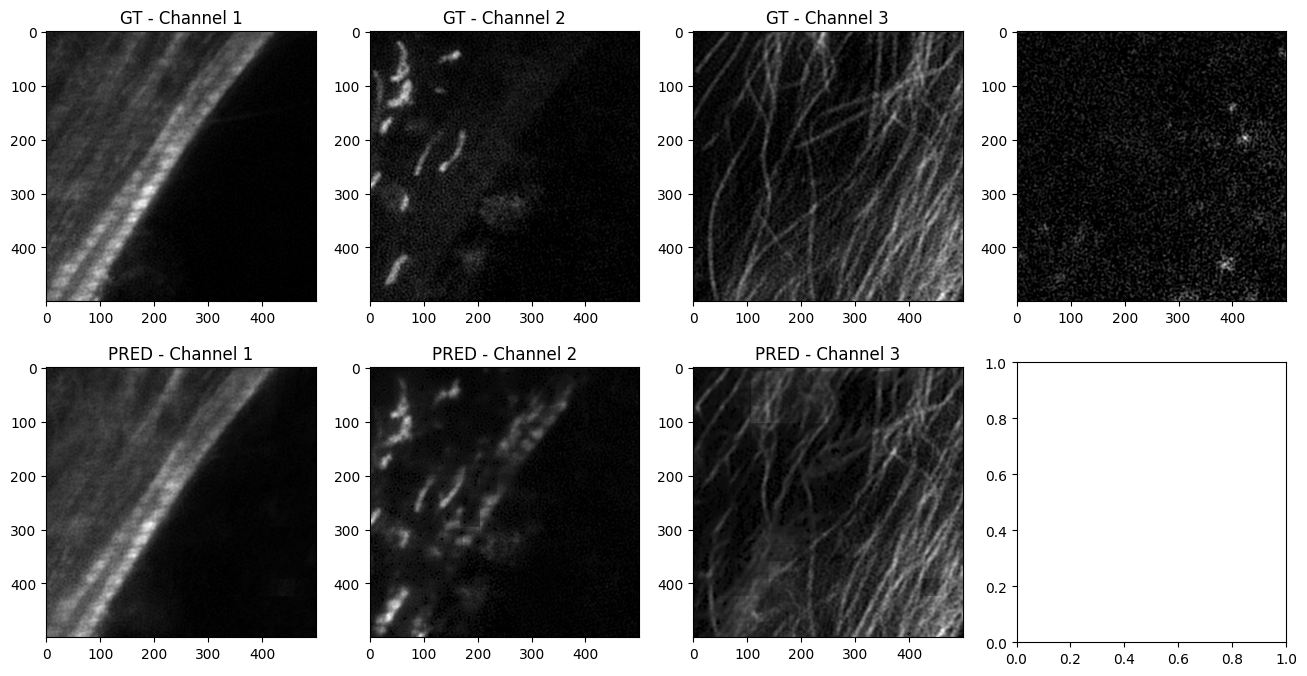

In [24]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
for i in range(3):
    ax[0, i].imshow(gt[1000:1500, -1500:-1000, i], cmap="gray")
    ax[0, i].set_title("GT - Channel {}".format(i + 1))
    ax[1, i].imshow(pred[0, 1000:1500, -1500:-1000, i], cmap="gray")
    ax[1, i].set_title("PRED - Channel {}".format(i + 1))
ax[0, 3].imshow(gt[1000:1500, -1500:-1000, 3], cmap="gray")

In [ ]:
from disentangle.data_loader.train_val_data import get_train_val_data
from disentangle.config_utils import load_config
from disentangle.scripts.evaluate import get_data_dir
from disentangle.core.data_split_type import DataSplitType
from disentangle.core.tiff_reader import save_tiff, load_tiff
import os

gt_root_dir = "/group/jug/ashesh/kth_data"
pred_rootdir = "/group/jug/ashesh/training/disentangle"
output_data_dir = "/group/jug/ashesh/naturemethods/four_splitting/"
KTH_SAMPLE = 1


def sample_subdir(k):
    return "kth{}".format(k)


def get_gt_dir(dtype):
    gt_dir = os.path.join(gt_root_dir, dtype)
    gt_dir = os.path.join(gt_dir, sample_subdir(KTH_SAMPLE))
    return gt_dir


def get_kth_gt(val_data):
    if hasattr(val_data, "_data"):
        gt_data = val_data._data[KTH_SAMPLE][0]
    else:
        gt_data = val_data[KTH_SAMPLE]
    return gt_data


full_frame_pred_dirs = {
    # '2406/D25-M3-S0-L8/12': f'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk8_F/kth_{KTH_SAMPLE}/pred_training_disentangle_2406_D25-M3-S0-L8_12_1.tif',
    "2406/D18-M3-S0-L8/1": f"/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif",
    # '2507/D33-M3-S0-L8/22':f'/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2507_D33-M3-S0-L8_22_1.tif'
    # '2507/D33-M3-S0-L8/21':f'/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2507_D33-M3-S0-L8_21_1.tif'
    # '2507/D33-M3-S0-L8/19': f'/group/jug/ashesh/data/paper_stats/Test_P64_G3-32-32_M50_Sk0/kth_{KTH_SAMPLE}/pred_training_disentangle_2507_D33-M3-S0-L8_19_1.tif'
}


crops_pred_dirs = {
    # '2404/D21-M3-S0-L8/6':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_6.pkl',
    # '2404/D25-M3-S0-L8/97':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_97.pkl',
    # '2404/D25-M3-S0-L8/120':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_120.pkl',
    # '2404/D25-M3-S0-L8/111':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_111.pkl',
    # '2404/D25-M3-S0-L8/125':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_125.pkl',
    # '2404/D25-M3-S0-L8/139':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_139.pkl',
    # '2404/D25-M3-S0-L8/143':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D25-M3-S0-L8_143.pkl',
    # '2405/D18-M3-S0-L8/13':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_13.pkl',
    # '2405/D18-M3-S0-L8/14':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_14.pkl',
    # '2405/D18-M3-S0-L8/15':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_15.pkl',
    # '2405/D18-M3-S0-L8/10':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_10.pkl',
    # '2405/D18-M3-S0-L8/11':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_11.pkl',
    # '2405/D18-M3-S0-L8/12':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2405_D18-M3-S0-L8_12.pkl',
    # '2404/D17-M3-S0-L8/4':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D17-M3-S0-L8_4.pkl',
    # '2404/D21-M3-S0-L8/1':'/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_disentangle_2404_D21-M3-S0-L8_1.pkl',
}

resolution_nm_dict = {
    "2404/D21-M3-S0-L8/6": 110,
    "2406/D25-M3-S0-L8/12": 285,
    "2406/D18-M3-S0-L8/1": 270,
    "2507/D33-M3-S0-L8/22": 45,
}

### Fetch the kth frame data and store it for fast access

In [ ]:
for model_dir, pred_fpath in full_frame_pred_dirs.items():
    dtype = model_dir.split("/")[1].split("-")[0]
    gt_dir = get_gt_dir(dtype)

    if not os.path.exists(gt_dir):
        print("No such dir {}. Creating it".format(gt_dir))
        os.makedirs(gt_dir, exist_ok=True)

    gt_fpath = os.path.join(gt_dir, "gt_for_" + os.path.basename(pred_fpath))
    if not os.path.exists(gt_fpath):
        print("GT data is not present at {}. Creating it".format(gt_fpath))
        # loading directory.
        config = load_config(os.path.join(pred_rootdir, model_dir, "config.pkl"))
        val_data = get_train_val_data(
            config.data,
            get_data_dir(int(dtype[1:])),
            DataSplitType.Test,
            val_fraction=config.training.val_fraction,
            test_fraction=config.training.test_fraction,
        )
        kth_gt = get_kth_gt(val_data)
        save_tiff(gt_fpath, kth_gt)


No such dir /group/jug/ashesh/kth_data/D18/kth5. Creating it
GT data is not present at /group/jug/ashesh/kth_data/D18/kth5/gt_for_pred_training_disentangle_2406_D18-M3-S0-L8_1_1.tif. Creating it



/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


### Loading data

In [ ]:
from disentangle.core.tiff_reader import load_tiff
from tqdm import tqdm

gt_pred_dict = {}
for model_dir, pred_fpath in tqdm(full_frame_pred_dirs.items()):
    dtype = model_dir.split("/")[1].split("-")[0]
    gt_dir = get_gt_dir(dtype)
    gt_fpath = os.path.join(gt_dir, "gt_for_" + os.path.basename(pred_fpath))
    kth_gt = load_tiff(gt_fpath)
    kth_pred = load_tiff(pred_fpath)
    print(pred_fpath)
    gt_pred_dict[model_dir] = (kth_gt, kth_pred)


In [ ]:
kth_gt.shape, kth_pred.shape

In [ ]:
# 4 columns, 2 rows matplotlib figure
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(2, 6, figsize=(24, 8))
for i in range(6):
    vmin = np.min(kth_gt[..., i])
    vmax = np.max(kth_gt[..., i])
    ax[0, i].imshow(kth_gt[..., i])  # , vmin=vmin, vmax=vmax)
    ax[1, i].imshow(kth_pred[..., i])  # , vmin=vmin, vmax=vmax)

In [ ]:
# https://www.notion.so/Evaluating-2-channel-results-281cea8bb51c47ccadd50a389614100f?pvs=4

keys = [
    # "2406/D25-M3-S0-L8/12",
    # '2406/D18-M3-S0-L8/1',
    "2507/D33-M3-S0-L8/22"
]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def get_input(gt):
    synthetic_input = None
    if gt.shape[-1] == pred.shape[-1]:
        inp = gt.mean(axis=-1)
        synthetic_input = True
    else:
        assert gt.shape[-1] == 1 + pred.shape[-1], f"Expected {pred.shape[-1]} channels. Got {gt.shape[-1]} channels."
        inp = gt[..., -1]
        synthetic_input = False
    return inp, synthetic_input


key = keys[-1]
print(key)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pandas as pd

# 5x10 grid for the input. 2x10 grid for the two targets and predictions.


def get_cropped_img(inp, hfac, hs=None, ws=None, wN=None, extra_h=0, extra_w=0):
    if wN is None:
        wN = inp.shape[1]

    if ws is None:
        ws = (inp.shape[1] - wN) // 2
    else:
        assert ws + wN < inp.shape[1], f"Invalid ws for the input. ws = {ws}, wN = {wN}, inp.shape = {inp.shape}"

    hN = int(wN * hfac)
    if hs is None:
        hs = (inp.shape[0] - hN) // 2
    else:
        assert hs + hN < inp.shape[0], f"Invalid hs for the input. hs = {hs}, hN = {hN}, inp.shape = {inp.shape}"

    coords = (hs - extra_h // 2, ws - extra_w // 2, hN + extra_h // 2, wN + extra_w // 2)
    return inp[hs - extra_h // 2 : hs + hN + extra_h // 2, ws - extra_w // 2 : ws + wN + extra_w // 2], coords


def find_most_interesting_box(inp_crop, channel_h_factor):
    """
    Returns hs, the start of the box
    """
    boxH = int(np.ceil(channel_h_factor * inp_crop.shape[0]))
    idx = np.argmax(pd.Series(inp_crop.std(axis=1)).rolling(window=boxH).mean().iloc[boxH:].values)
    return idx

In [ ]:
# Aspect ratio
# Two splitting task
# h * 2w
# h * 2w

# Three splitting task
# h * 3w
# h * 3w

# So, the first row is
# h * 5w
# h * 5w

# The second row is
# h * 4w
# h * 4w

# In both rows, we will have
# 2h *w


# Fig 1 crops

In [ ]:
input_h_factor = 0.75
# nicola
# wN = 400
# tar_wN = 250

# dao
# wN = 1800
# tar_wN = 800

wN = 900
tar_wN = 400


# Target crop
tar_h_factor = 0.75
tar_hN = int(tar_h_factor * tar_wN)

savefig = False
# nikola 4ch (814, 378)
if savefig is False:
    ws = np.random.randint(0, gt_pred_dict[key][0].shape[0] - wN)
    hs = np.random.randint(0, gt_pred_dict[key][0].shape[1] - int(wN / input_h_factor))

In [ ]:
# hs = 1500
# ws = 1500

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar

# Input crop
_, ax_inp = plt.subplots(figsize=(5, 5))

key = keys[0]
gt, pred = gt_pred_dict[key]
gt = gt.squeeze()
pred = pred.squeeze()
inp = get_input(gt)[0]
inp_crop, input_coordinates = get_cropped_img(inp, input_h_factor, wN=wN, ws=ws, hs=hs)
ax_inp.imshow(inp_crop, cmap="magma")

scalebar = ScaleBar(
    resolution_nm_dict[key],
    "nm",
    # length_fraction=0.1,
    box_alpha=0.6,
    frameon=True,
    location="upper right",
    font_properties={"size": 16},
)

ax_inp.add_artist(scalebar)

if savefig:
    ax_inp.axis("off")


# =============================================
# Set the top-left location
tar_rel_hs = 400
tar_rel_ws = 100
relative_coordinates = (tar_rel_hs, tar_rel_ws, tar_hN, tar_wN)
assert tar_rel_hs + tar_hN < inp_crop.shape[0], (
    f"Invalid tar_rel_hs for the input. tar_rel_hs = {tar_rel_hs}, tar_hN = {tar_hN}, inp_crop.shape = {inp_crop.shape}"
)
assert tar_rel_ws + tar_wN < inp_crop.shape[1], (
    f"Invalid tar_rel_ws for the input. tar_rel_ws = {tar_rel_ws}, tar_wN = {tar_wN}, inp_crop.shape = {inp_crop.shape}"
)

rect = patches.Rectangle(
    (relative_coordinates[1], relative_coordinates[0]),
    relative_coordinates[3],
    relative_coordinates[2],
    linewidth=2,
    edgecolor="w",
    facecolor="none",
    linestyle="--",
)
ax_inp.add_patch(rect)

if savefig:
    # filename should contain all cropping information
    fname = "cropped_Input_{}_K{}_{}-{}-{}-{}.png".format(
        key.replace("/", "_"),
        KTH_SAMPLE,
        input_coordinates[1],
        input_coordinates[0],
        input_coordinates[3],
        input_coordinates[2],
    )

    fpath = os.path.join(output_data_dir, fname)
    print(fpath)
    plt.savefig(fpath, dpi=150, bbox_inches="tight")


In [ ]:
ncols = 4
nrows = 2
img_sz = 3
_, ax = plt.subplots(figsize=(ncols * img_sz, nrows * img_sz * tar_h_factor), ncols=ncols, nrows=nrows)

tar_hs = tar_rel_hs + input_coordinates[0]
tar_ws = tar_rel_ws + input_coordinates[1]
gt_crop = gt[tar_hs : tar_hs + tar_hN, tar_ws : tar_ws + tar_wN]
pred_crop = pred[tar_hs : tar_hs + tar_hN, tar_ws : tar_ws + tar_wN]
for i in range(ncols):
    ax[0, i].imshow(gt_crop[..., i], cmap="magma")
    ax[1, i].imshow(pred_crop[..., i], cmap="magma")
    ax[0, i].axis("off")
    ax[1, i].axis("off")

# reduce the space between the subplots
plt.subplots_adjust(wspace=0.01, hspace=0.01)

if savefig:
    # filename should contain all cropping information
    fname = "cropped_TarPred_{}_K{}_{}-{}-{}-{}.png".format(
        key.replace("/", "_"), KTH_SAMPLE, tar_hs, tar_ws, tar_hN, tar_wN
    )
    fpath = os.path.join(output_data_dir, fname)
    print(fpath)
    plt.savefig(fpath, dpi=150, bbox_inches="tight")